### 6.4 확률분포 함수

- 확률이 어디, 어느정도 분포 되어 있는가를 수학적으로 명시하고 명확하게 전달하기 위한 도구
- 정의, 확률질량함수, 누적분포함수, 확률밀도함수 

- 확률분포
    - 어떤 사건에 어느정도의 확률이 할당되었는지 묘사한 정보
    - 사건이라는 표본 집합에 대해 숫자 할당
    - 확률질량함수, 누적분포함수. 확률밀도함수

- 단순사건과 확률질량함수
    - 단순사건 : 표본이 하나인 사건
    - 단순사건 끼리는 서로 교집합을 가지지 않는다. 
    - 유한 개의 사건만 있는 경우, 모든 단순사건의 확률값을 알면 콜모고로프 세번째 공리에 의해 다른 모든 사건의 확률값 계산 가능
    - 정의 : 유한개의 사건이 존재하는 경우, 각 단순 사건에 대한 확률만 정의하는 함수
    - 확률과 확률 질량함수는 다른 개념
    - 그 원소만을 가진 단순사건에 대해서만 정의된다.

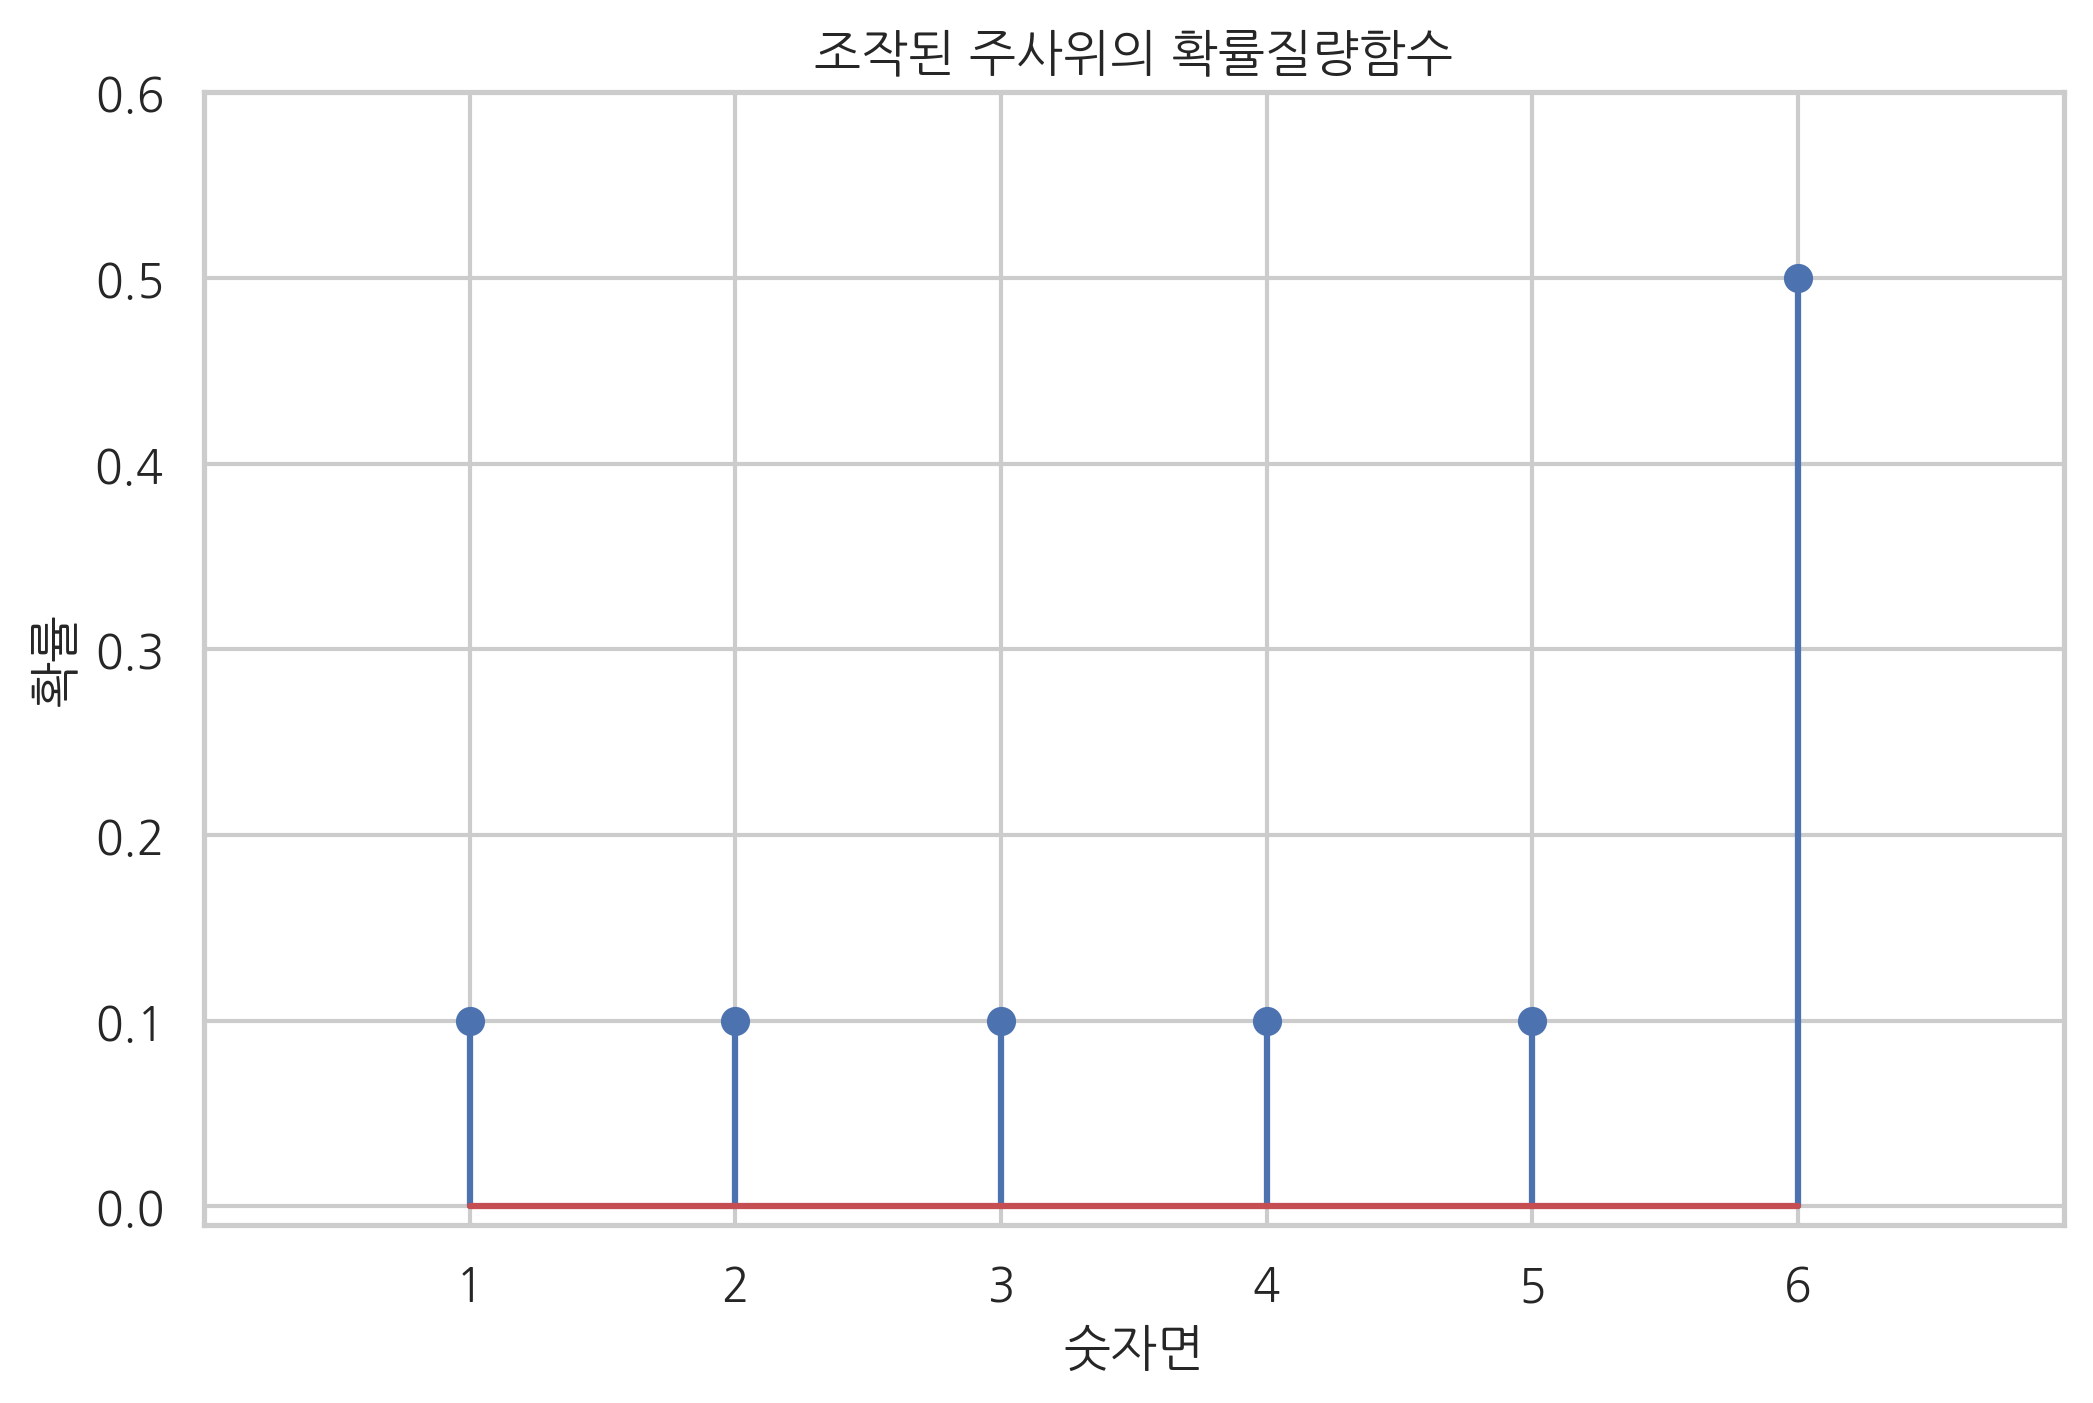

In [2]:
x = np.arange(1, 7)
y = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
plt.stem(x, y)
plt.title("조작된 주사위의 확률질량함수")
plt.xlabel("숫자면")
plt.ylabel("확률")
plt.xlim(0, 7)
plt.ylim(-0.01, 0.6)
plt.xticks(np.arange(6) +1)
plt.show()

- 표본수가 무한한 경우
    - 표본 수가 무한하면 확률질량함수를 사용하여 확률을 정의할 수 없다.
    - 표본이 아닌 사건으로 정의한 이유이다.
    - 표본 수가 무한하고 모든 표본에 대해 표본 하나만을 가진 사건의 확률이 동일하다면, 표본 하나에 대한 사건의 확률은 언제나 0이다.

- 구간
    - 표본공간이 실수의 집합이라면 대부분의 사건(부분집합)은 시작점과 끝점으로 이루어진 구간(interval)으로 표현된다.
    - A = {a < x <= b}
    - 구간의 확률만 표현된다면 여러 구간으로 이루어진 복잡한 사건은 콜모고로프 공리에 따라 각 구간의 확률값의 더하기나 빼기로 표현가능
    - 

In [11]:
def round_one(a, b):
    if a > b:
        raise ValueError("a must be less than ")
    a = np.maximum(a, 0)
    b = np.minimum(b, 360)
    
    if b < 180:
        return (2 / 3) * ((b - a) / 180)
    else:
        if a < 180:
            return (2 / 3) * ((180 -a) / 180) + (1 / 3) * ((b - 180) / 180)
        return (1 / 3) * (((b - a) / 180))
    

round_one(90, 100)
        
    

        

0.037037037037037035

### 누적분포함수
- 숫자 하나만으로 사건, 구간을 정의할 수 있는 방법은..?
- 음의 무한대로 통일한 특수한 구간 Sx를 사용
- F(x) = P(Sx) = P({X < x})
- 음의 무한대에 대한 누적분포함수값은 0이다.
- 양의 무한대에 대한 누적분포함수값은 1이다.
- 입력이 크면 누적분포함수값은 같거나 커진다.
    - x > y ->  F(x) >= F(y)
- 0에서 시작하여 천천히 1로 증가하는 형태. 단조증가 성질

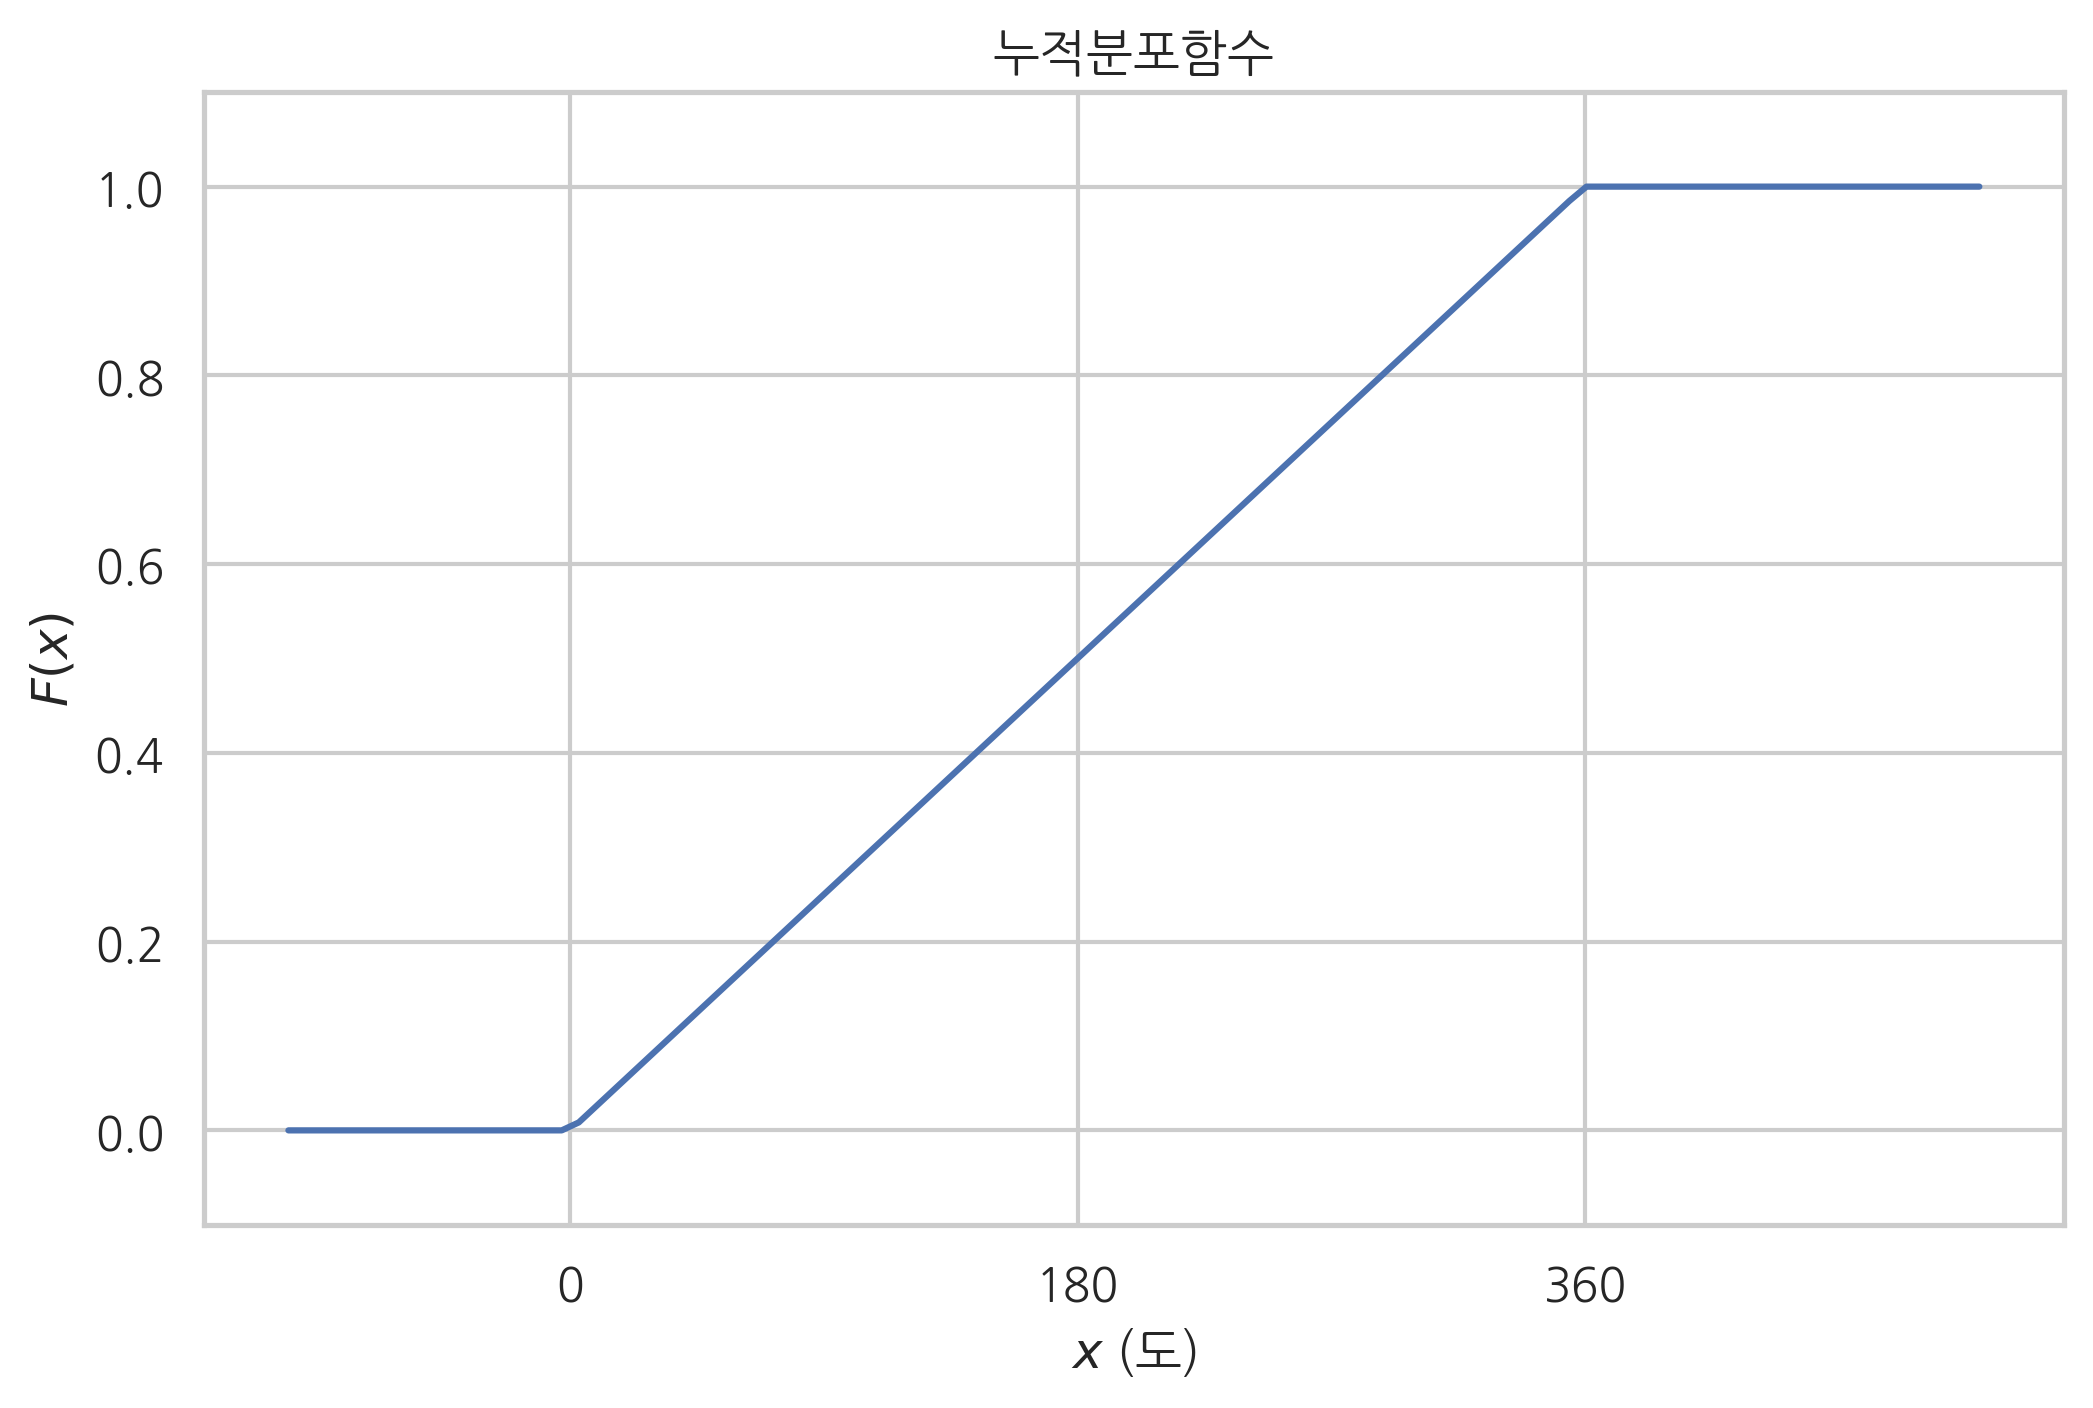

In [13]:
t = np.linspace(-100, 500, 100)
F = t / 360
F[t < 0] = 0
F[t > 360] = 1
plt.plot(t, F)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()


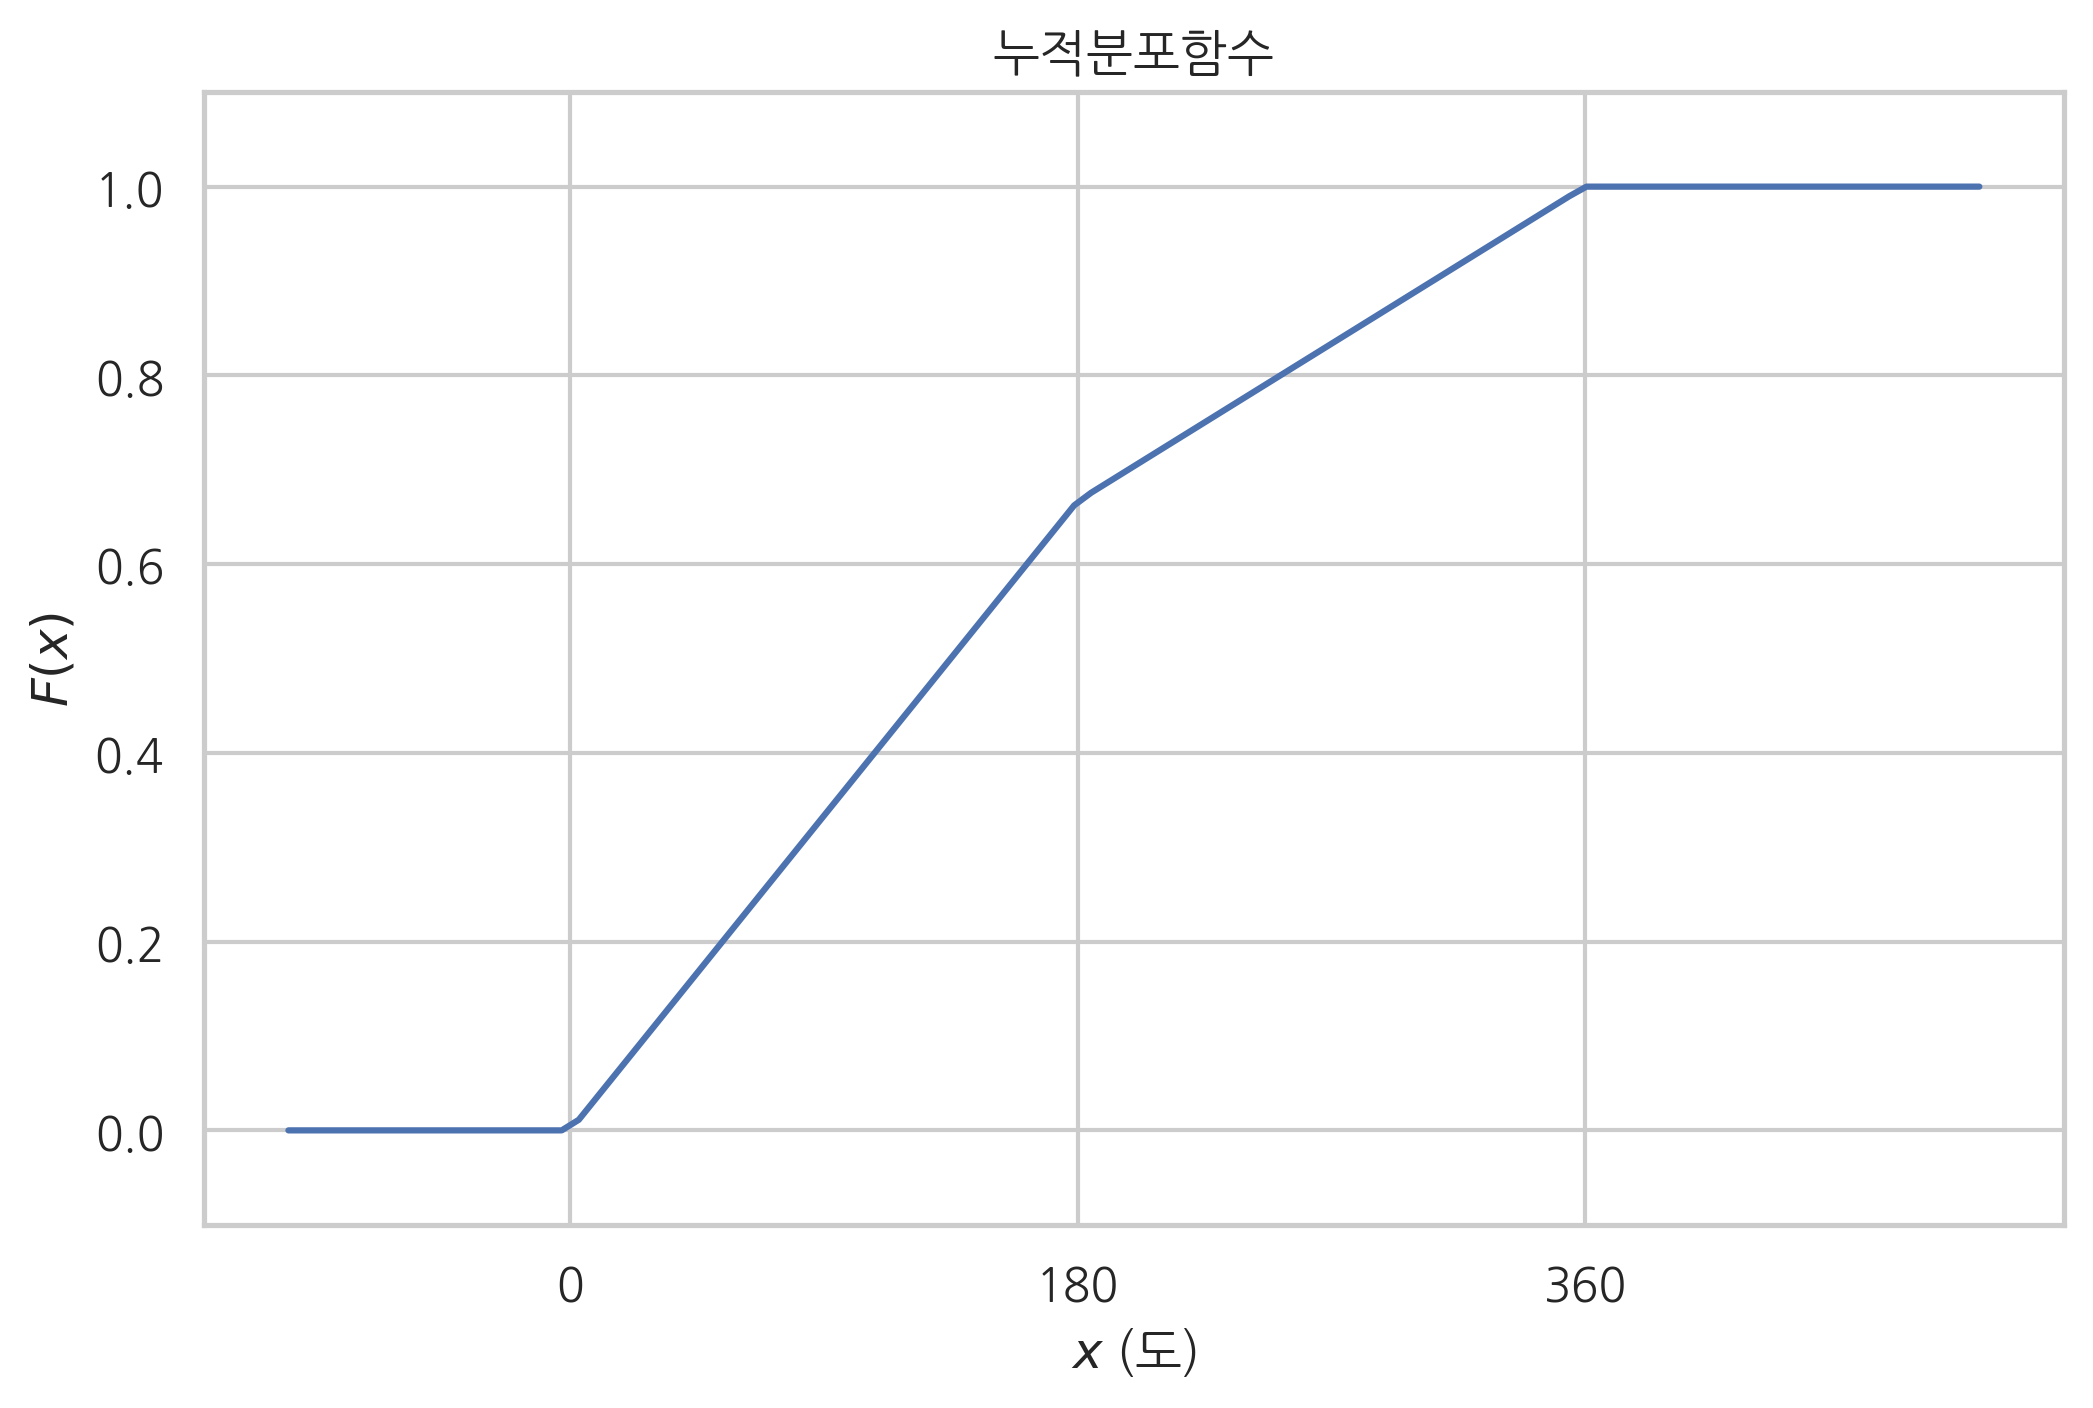

In [16]:
def F(a):
    if a < 0:
        return 0
    if a > 360:
        return 1
    elif a < 180:
        return (2 / 3) * (a / 180)
    elif a >= 180:
        return (2 / 3) + (1 / 3) * ((a - 180) / 180)
    
t = np.linspace(-100, 500, 100)
Fs = np.array(list(map(F, t)))
plt.plot(t, Fs)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()

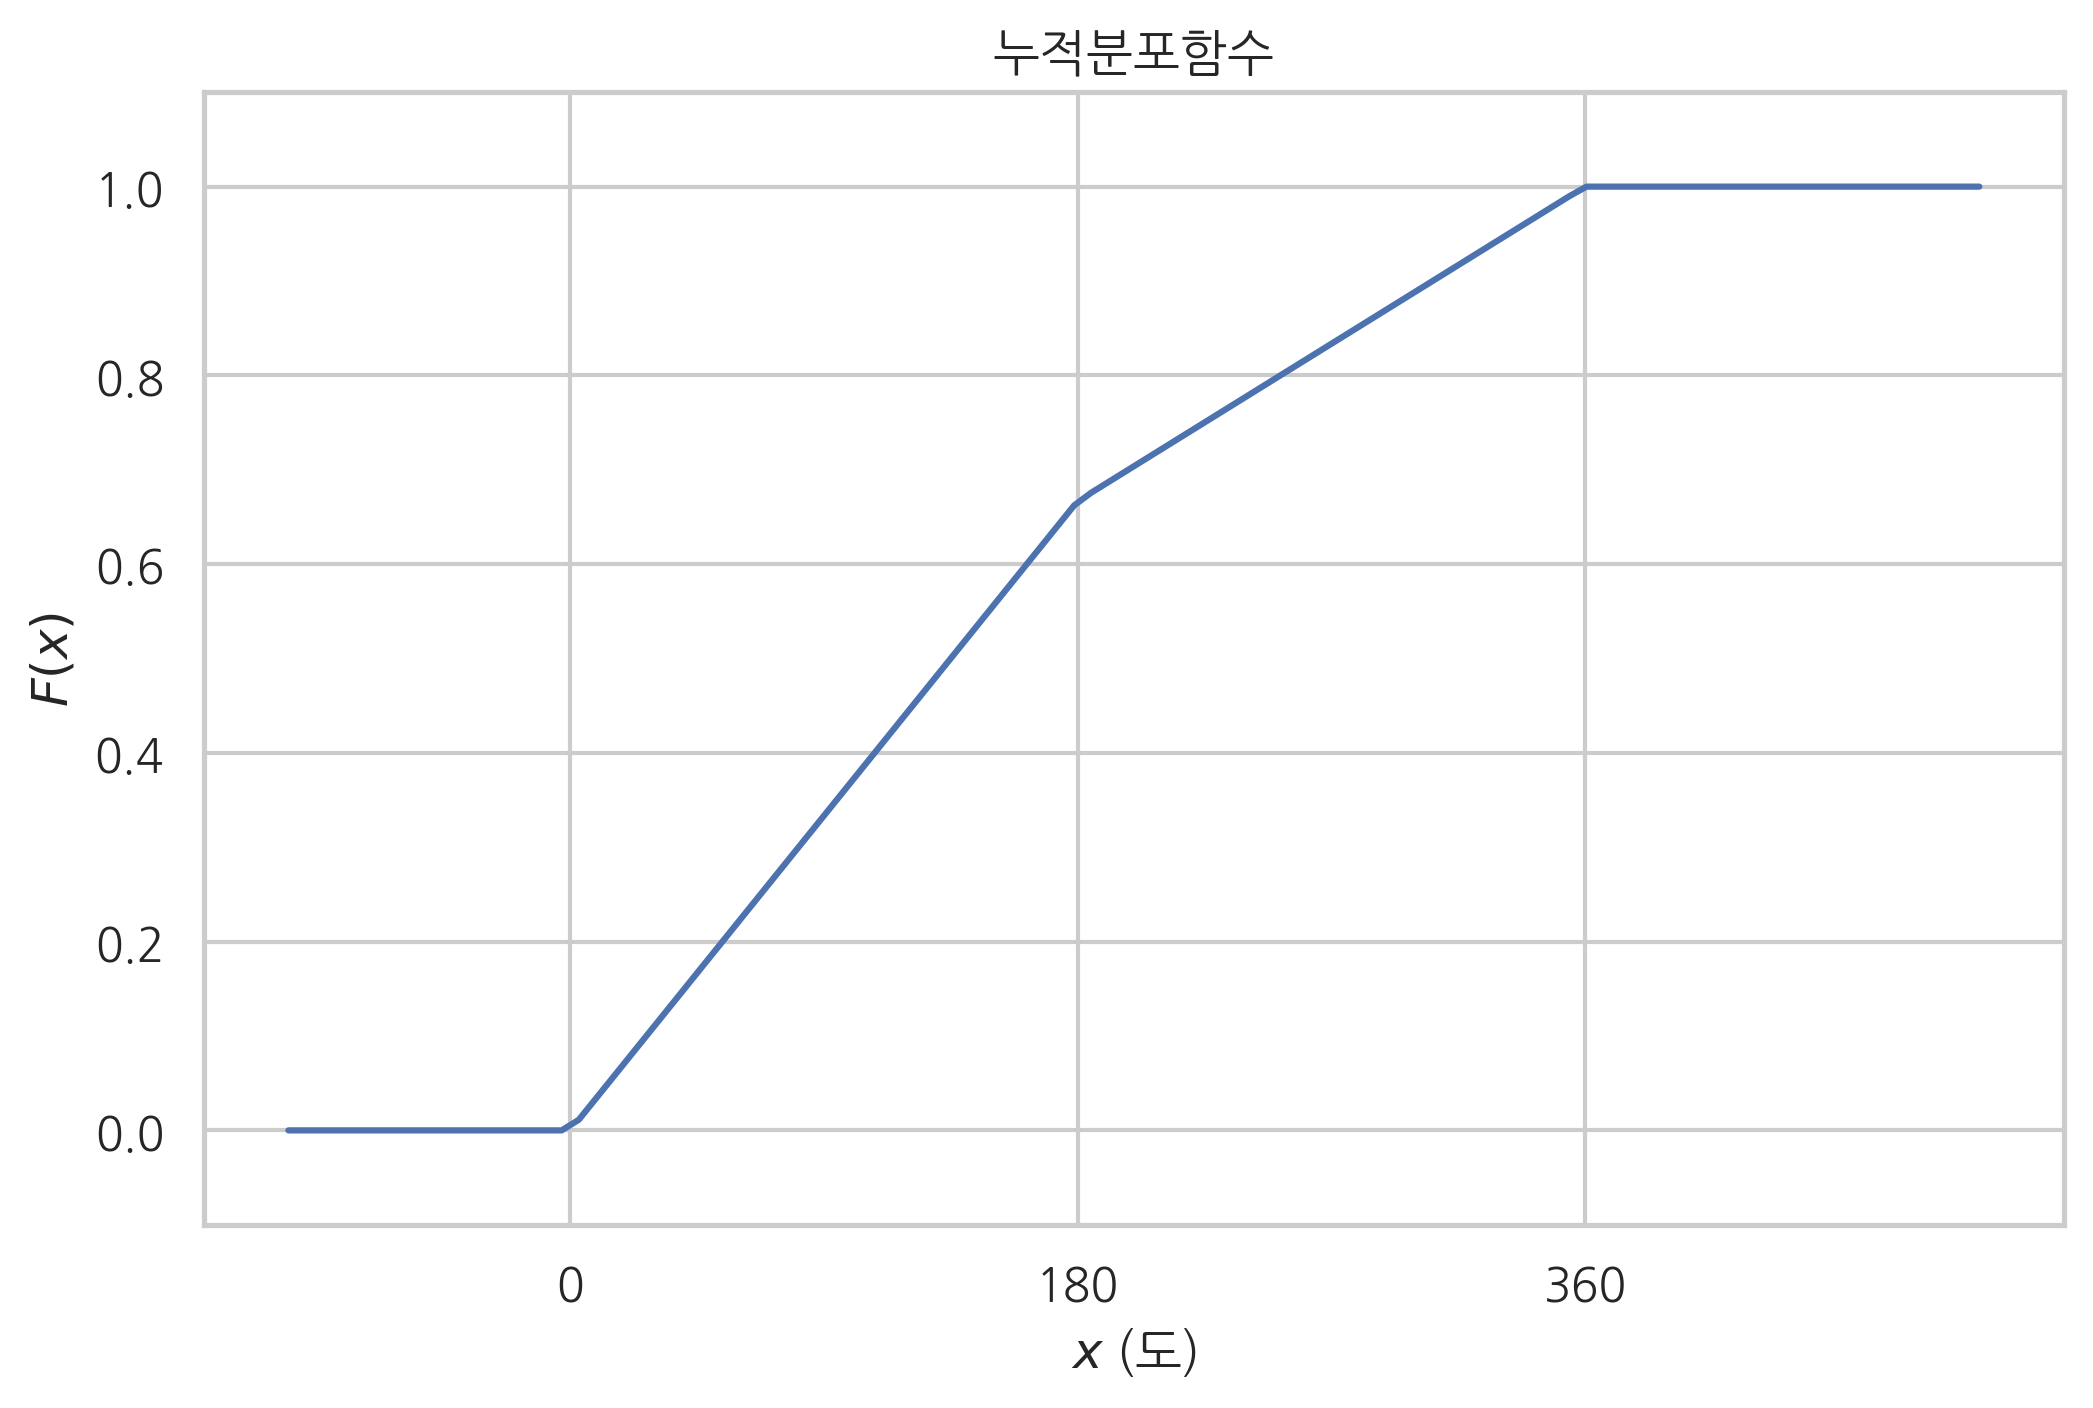

In [15]:
F = lambda a: 0 if a < 0 else 1 if a > 360 else a / 270 if a < 180 else (2 / 3) + (a - 180) / 540
t = np.linspace(-100, 500, 100)
Fs = np.array(list(map(F, t)))
plt.plot(t, Fs)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 180, 360])
plt.title("누적분포함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$F(x)$")
plt.show()

In [20]:
Fs

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01122334, 0.03367003, 0.05611672,
       0.07856341, 0.1010101 , 0.12345679, 0.14590348, 0.16835017,
       0.19079686, 0.21324355, 0.23569024, 0.25813692, 0.28058361,
       0.3030303 , 0.32547699, 0.34792368, 0.37037037, 0.39281706,
       0.41526375, 0.43771044, 0.46015713, 0.48260382, 0.50505051,
       0.52749719, 0.54994388, 0.57239057, 0.59483726, 0.61728395,
       0.63973064, 0.66217733, 0.67564534, 0.68686869, 0.69809203,
       0.70931538, 0.72053872, 0.73176207, 0.74298541, 0.75420875,
       0.7654321 , 0.77665544, 0.78787879, 0.79910213, 0.81032548,
       0.82154882, 0.83277217, 0.84399551, 0.85521886, 0.8664422 ,
       0.87766554, 0.88888889, 0.90011223, 0.91133558, 0.92255892,
       0.93378227, 0.94500561, 0.95622896, 0.9674523 , 0.97867

###  확률밀도함수
- 어떤 확률 변수 값이 더 자주 나오는지 정보를 알기 힘들다.
- 특정한 구간의 확률이 다른 구간에 비해 상대적으로 얼마나 높은가
- 그 값 자체가 확률은 아니다.

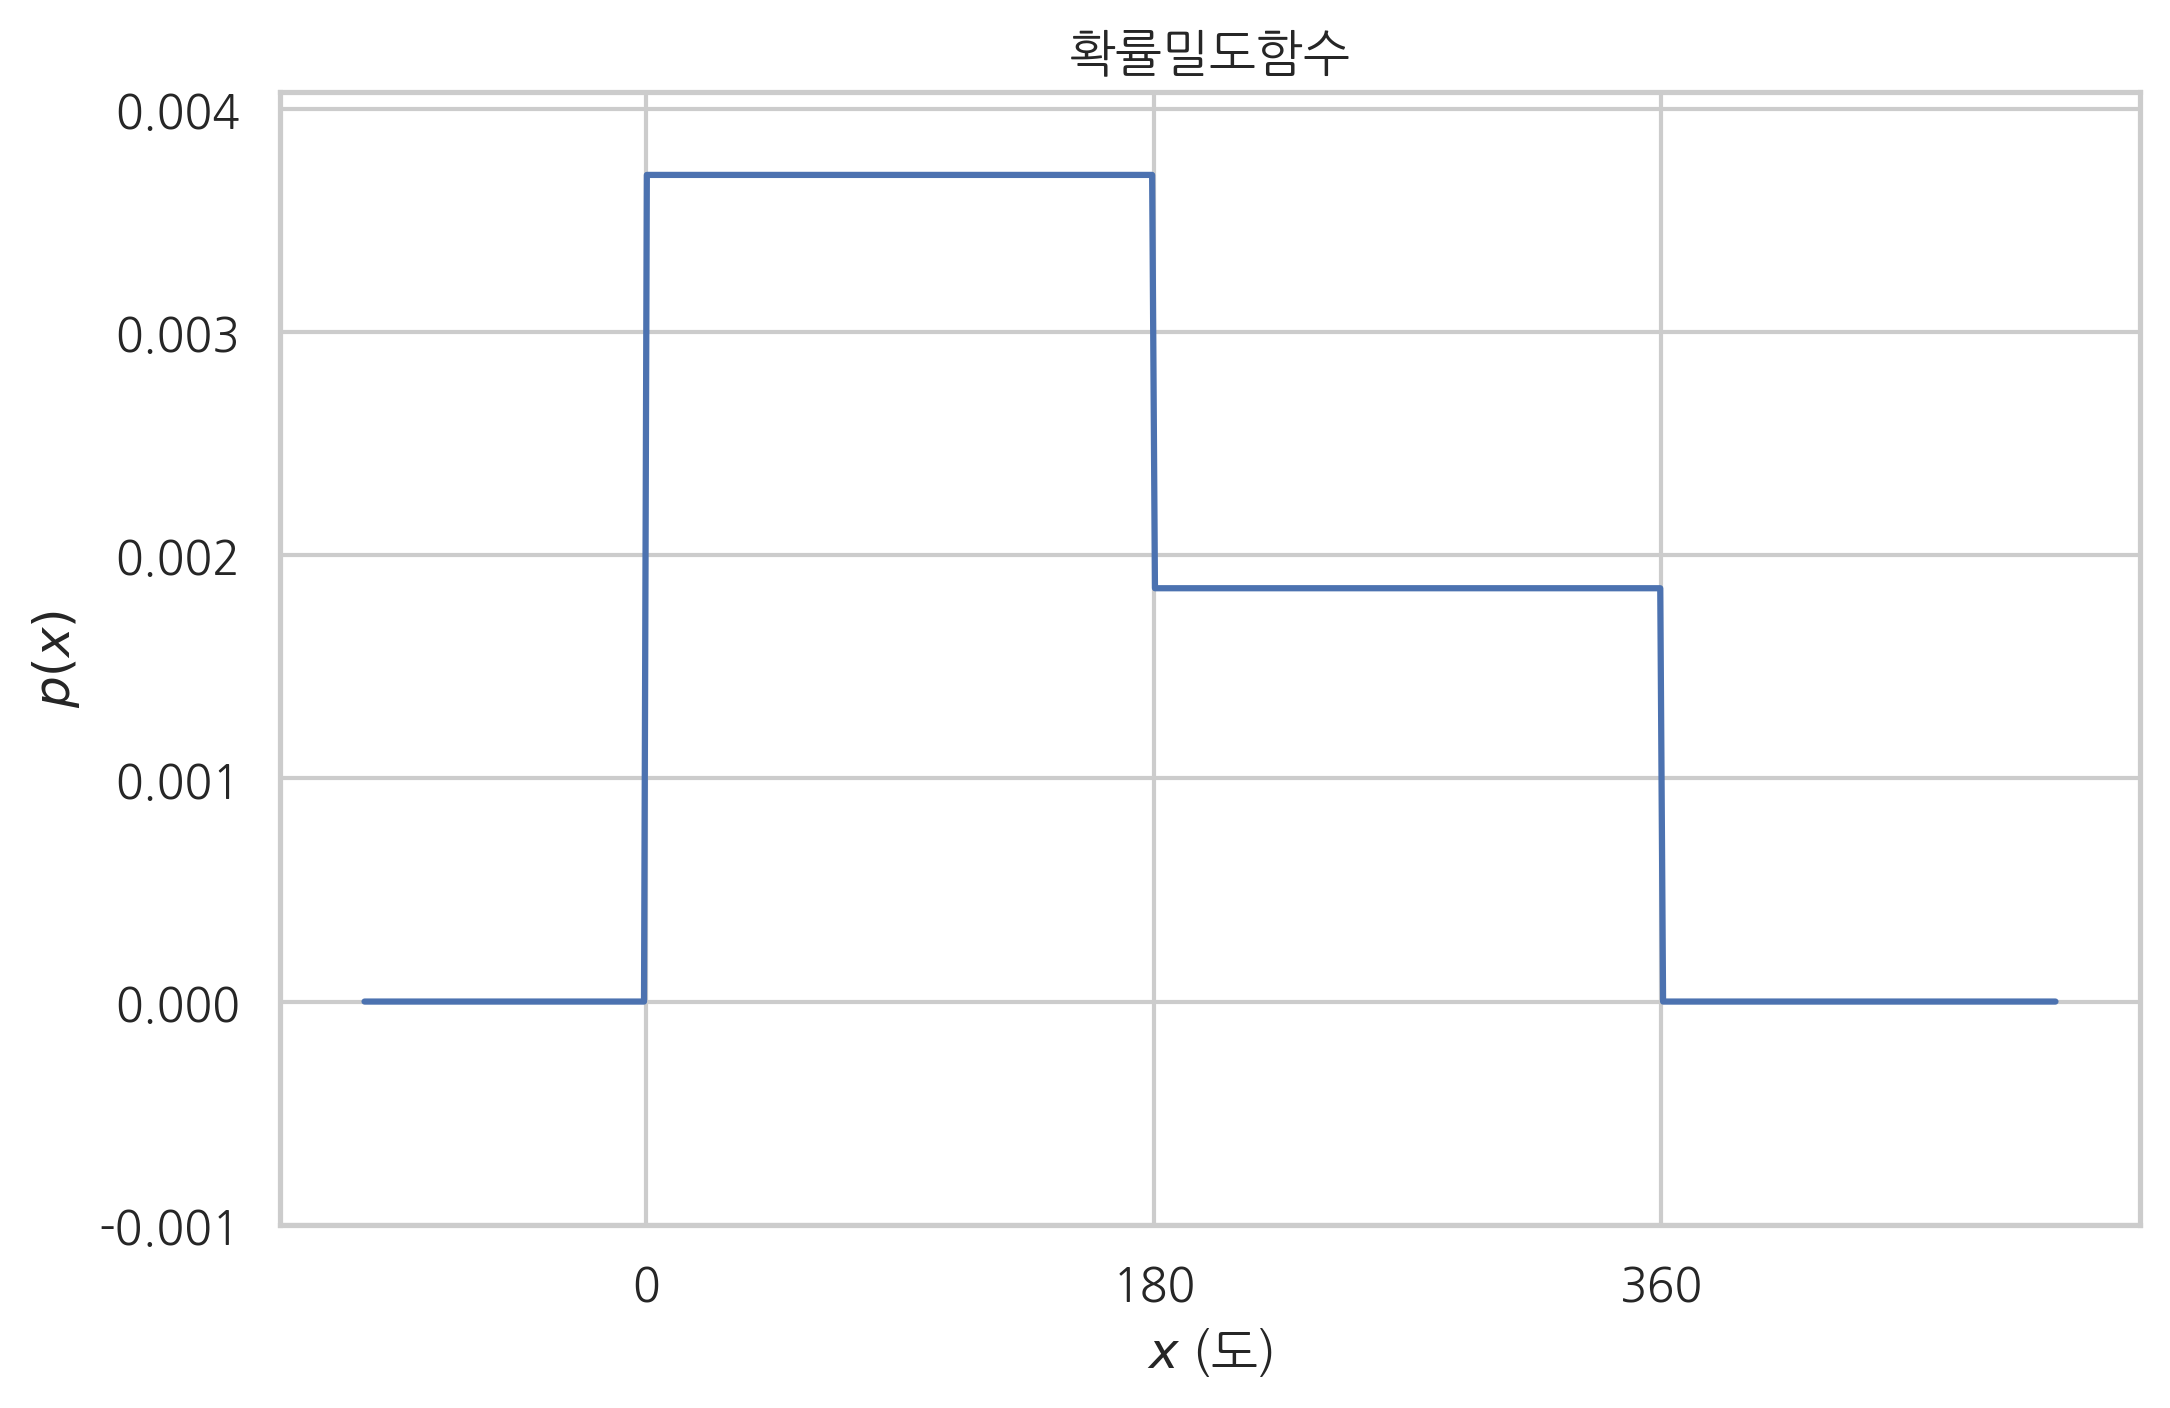

In [24]:
def p(a):
    if a < 0 or a > 360:
        return 0
    elif a < 180:
        return 2 / 3 / 180
    elif a >= 180:
        return 1 / 3 / 180
    
t = np.linspace(-100, 500, 600)
ps = np.array(list(map(p, t)))
plt.plot(t, ps)
plt.ylim(-0.001, ps.max() * 1.1)
plt.xticks([0, 180, 360])
plt.title("확률밀도함수")
plt.xlabel("$x$ (도)")
plt.ylabel("$p(x)$")
plt.show()